# Introduction to neural network classification with TensorFlow

 A classification is where you try to cassify something as one thing or another

 * Binary classificaion
 * Multiclass classification
 * Multilabel classification

# Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles


# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check out features
X[:10]

In [ ]:
# Check the labels
y[:10]

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
  X.shape, y.shape

In [7]:
len(X), len(y)

(1000, 1000)

In [8]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFloe are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [9]:
# Clear any logs from previous runs
!rm -rf ./logs/

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [10]:
# Load the TensorBoard notebook extension
%reload_ext tensorboard

SyntaxError: cannot assign to expression (2263310151.py, line 1)

In [14]:
import tensorflow as tf

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [11]:
import tensorflow as tf
import datetime
import wandb
from wandb.keras import WandbCallback

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [35]:
# # Set the random seed
# tf.random.set_seed(42)

# # Initialize W&B
# wandb.init(project="Classification_fundamentals", name="Dense:1:Sigmoid.SGD.E:5")

# # 1. Create a model
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1, activation="sigmoid")  # Add activation="sigmoid"
# ])

# # 2. Compile the model
# model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
#               optimizer=tf.keras.optimizers.SGD(),
#               metrics=["accuracy"])  # Use a list for metrics

# # Set up TensorBoard callback
# model_info = "Sigmoid.SGD.E:5"
# log_dir = "logs/fit/" + model_info + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# # 3. Fit the model with both callbacks
# model.fit(X, y, epochs=5, callbacks=[tensorboard_callback, WandbCallback()])

In [34]:
# import os
# import datetime

# # Set the random seed
# tf.random.set_seed(42)

# # Create a model
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1, activation="sigmoid")  # Add activation="sigmoid"
# ])

# # Compile the model
# model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
#               optimizer=tf.keras.optimizers.SGD(),
#               metrics=["accuracy"])  # Use a list for metrics

# # Specify absolute path for TensorBoard logs
# absolute_path = os.path.abspath(
#     "C:\\Users\\Kajetan\\tensorflow_fundamentals-main\\logs\\fit"
# )

# # Set up TensorBoard callback
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=absolute_path)

# # Fit the model with both callbacks
# model.fit(X, y, epochs=5, callbacks=[tensorboard_callback])


Epoch 1/5


32/32 [==============================] - 2s 5ms/step - loss: 0.8571 - accuracy: 0.5020
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 0.8487 - accuracy: 0.5020
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.8409 - accuracy: 0.5030
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.8332 - accuracy: 0.5020
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.8257 - accuracy: 0.5020


In [14]:
# Start a new TensorBoard instance
%tensorboard --logdir logs/fit

In [15]:
from tensorflow.keras.utils import plot_model
plot_model(model=model_1, show_shapes=True)

NameError: name 'model_1' is not defined

In [57]:
tf.random.set_seed(42)

wandb.init(project="Classification_fundamentals", name="Dense:100:10:1.Relu.Sigmoid.E:250")

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

model_into = "Dense:100:10:1.Relu.Sigmoid.E:250"
log_dir = "logs/fit" + model_info + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    profile_batch=0,  # No profiling
    write_images=True,  # Weight images
    embeddings_freq=1,
    embeddings_metadata='Dense:100:10:1.Relu.Sigmoid.E:250.tsv',
    update_freq='epoch'  # update after each epoch
)

model.fit(X, y, epochs=250, callbacks=[tensorboard_callback, WandbCallback()])

accuracy,▅▅▅▅▅▅▅▅▅▅▅▅▅▆▅▅▆▅▅▆▆▅▄▆▅▆▄▅▆▆█▄▄▃▇▅▄▁▃▃
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▆▄▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.477
epoch,249
loss,0.69322


Epoch 1/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5040
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5060
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4780
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4650
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4800
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4800
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4690
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4880
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4490
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 162/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4970
Epoch 163/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4800
Epoch 164/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4730
Epoch 165/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4730
Epoch 166/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4820
Epoch 167/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5060
Epoch 168/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4920
Epoch 169/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4850
Epoch 170/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4940
Epoc

In [58]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 15002), started 16:55:35 ago. (Use '!kill 15002' to kill it.)

In [56]:
# SInce we're working on a binary classfication problem and our odewl is getting aroud 50% acccuracy... 
# it is preforming as
# So let's step things up a notch and add an extra layer

In [62]:
# Set the random seed
tf.random.set_seed(42)

# Initialize W&B
wandb.init(project="Classification_fundamentals", name="Dense:1,1.Relu,Sigmoid.E:100")

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

# Set up TensorBoard callback
model_info = "Dense:1,1.Relu,Sigmoid.E:100"
log_dir = "logs/fit/" + model_info + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    profile_batch=1,
    write_images=True,
    embeddings_freq=1,
    embeddings_metadata="Dense:1,1.Relu,Sigmoid.E:100.tsv",
    update_freq="epoch"
)

# Fit the model
model_3.fit(X, y, epochs=100, verbose=0, callbacks=[tensorboard_callback, WandbCallback()])

accuracy,▇▄▄▃▃▄▅▅▆▇▂▅▇▅▂▁▆▅▂▄▃█▆▆▇█▃▆▆▆▆▆▆▆▆▆▆▄▂▇
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,▄▅▂▃▅▅▄▂▂▁▄▃▃█▄▃▄▁▂▃▃▃▃▆▄▄▅▄▃▂▄▃▄▁▄▆▅▆▅▅
accuracy,0.511
epoch,99
loss,0.69323


2023-12-17 11:29:35.756734: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2023-12-17 11:29:35.756762: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2023-12-17 11:29:35.758449: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2023-12-17 11:29:35.758547: I external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:2017] CUPTI activity buffer flushed
2023-12-17 11:29:35.842404: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2023-12-17 11:29:35.842431: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.


2023-12-17 11:29:36.151776: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2023-12-17 11:29:36.152036: I external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:2017] CUPTI activity buffer flushed
2023-12-17 11:29:36.156880: I external/local_xla/xla/backends/profiler/gpu/cupti_collector.cc:541]  GpuTracer has collected 0 callback api events and 0 activity events. 
2023-12-17 11:29:36.158032: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.


In [63]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 857us/step - loss: 0.6924 - accuracy: 0.5030


[0.6924315690994263, 0.503000020980835]

In [64]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 15002), started 17:05:16 ago. (Use '!kill 15002' to kill it.)

In [65]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

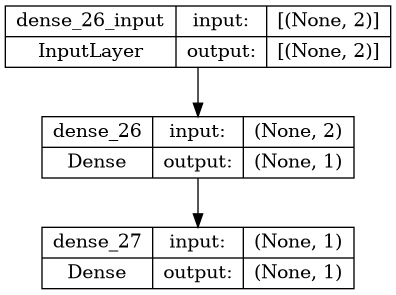

In [66]:
from tensorflow.keras.utils import plot_model
plot_model(model=model_3, show_shapes=True)

## Improving our  model

1. Create a model - we might to dd moe layers or increase the number of hidden units within a layer
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fir our model for more epochs (leave it training for longer)

In [220]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
wandb.init(project="Classification_fundamentals", name="Dense:100relu,10relu,1sigmoid.Adam.E:100")
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Set up TensorBoard callback with default values
model_info = "Dense:100relu,10relu,1sigmoid.Adam.E:100"
log_dir = "logs/fit/" + model_info + datetime.datetime.now().strftime("%Y:%:m%:d-%H%:M%:S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0, callbacks=[tensorboard_callback, WandbCallback()])

accuracy,▁▁▁▁▁▁▄▃▅▅▇███████████████████
epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
loss,████████▇▇▇▇▆▆▅▅▄▄▃▃▃▂▂▂▂▁▁▁▁▁
accuracy,0.999
epoch,29
loss,0.08179


In [221]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 75198), started 0:10:43 ago. (Use '!kill 75198' to kill it.)

In [82]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000


[0.0036392402835190296, 1.0]

In [83]:
metric_names = model_2.metrics_names

prefixed_metric_names_2 = [f"Model_2_{metric}" for metric in metric_names]
prefixed_metric_names_3 = [f"Model_3_{metric}" for metric in metric_names]

df = pd.DataFrame({
    "Metric": metric_names + metric_names,
    "Value": model_2.evaluate(X, y) + model_3.evaluate(X, y),
    "Model":  prefixed_metric_names_2 + prefixed_metric_names_3
})

df

32/32 [==============================] - 0s 946us/step - loss: 0.0036 - accuracy: 1.0000


,Metric,Value,Model
0,loss,0.692432,Model_2_loss
1,accuracy,0.503000,Model_2_accuracy
2,loss,0.003639,Model_3_loss
3,accuracy,1.000000,Model_3_accuracy


In [84]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
wandb.init(project="Classification_fundamentals", name="Dense:100relu,10relu,1sigmoid.Adam.E:30")
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Set up TensorBoard callback with default values
model_info = "Dense:100relu,10relu,1sigmoid.Adam.E:30"
log_dir = "logs/fit/" + model_info + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# 3. Fit the model
model_4.fit(X, y, epochs=30, verbose=0, callbacks=[tensorboard_callback, WandbCallback()])

accuracy,▁▁▁▄▇███████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,███▇▇▆▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,1.0
epoch,99
loss,0.00409


In [85]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 15002), started 17:50:14 ago. (Use '!kill 15002' to kill it.)

To visualize our model's predictions, let's create a function `plot_decision_boundary()`

* Take in a trained model, features (X), and labels (y)
* Create a meshgrid of the different X values
* Make predictions accros the meshgrid
* Plot the predicitoons as well as a line between zones

In [86]:
import numpy as np

In [112]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function has been adapted from two phenomenal resources:
    1. CS231n - https://cs231n.github.io/neural-networks-case-study/
    2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create X values (we're going to predict on all of these)
    # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
    x_in = np.c_[xx.ravel(), yy.ravel()]

    # Make predictions using the trained model
    y_pred = model.predict(x_in)

    # Check for multi-class
    # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    if model.output_shape[-1] > 1:
        print("doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 0s 799us/step
doing binary classifcation...


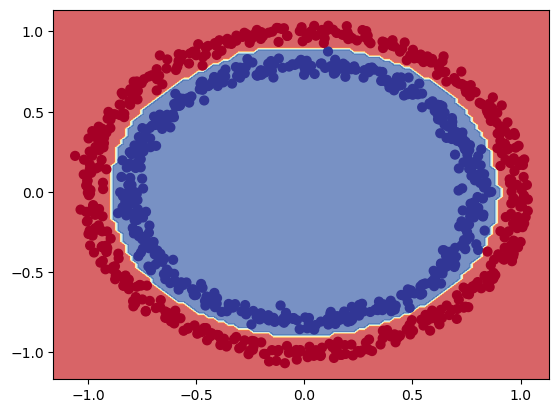

In [118]:
plot_decision_boundary(model=model_3,
                      X=X,
                      y=y)

In [88]:
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 0].max() + 0.1
    x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1337117525463374)

In [148]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

Oh wait... we compiled our model for a binary classification proble.

But... we're working on a regression problem, let's change the model to suit our data

In [149]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

model_info = "Regression.Dense:100,10,1.Adam:E:100"
log_dir = "logs/fit/" + model_info + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train, 
            epochs=100,
           callbacks=[tensorboard_callback])

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 451.6256 - mae: 451.6256
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 320.0744 - mae: 320.0744
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 192.4413 - mae: 192.4413
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 65.3078 - mae: 65.3078
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 81.0662 - mae: 81.0662
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 94.7430 - mae: 94.7430
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 58.8837 - mae: 58.8837
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 50.1001 - mae: 50.1001
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 49.0549 - mae: 49.0549
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 44.4916 - mae: 44.4916
Epoch 11/100
5/5 [==============================] - 0

In [150]:
model_3.evaluate(X_reg_train, y_reg_train)

5/5 [==============================] - 0s 1ms/step - loss: 37.8223 - mae: 37.8223


[37.82229232788086, 37.82229232788086]

In [151]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 15002), started 18:57:43 ago. (Use '!kill 15002' to kill it.)

In [230]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_4.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

model_info = "Regression.Dense:20,10,1.Adam:E:20"
log_dir = "logs/fit/" + model_info + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# 3. Fit the model
model_4.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train, 
            epochs=20,
           callbacks=[tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 0s 3ms/step - loss: 450.4804 - mae: 450.4804
Epoch 2/20
5/5 [==============================] - 0s 2ms/step - loss: 328.1139 - mae: 328.1139
Epoch 3/20
5/5 [==============================] - 0s 2ms/step - loss: 208.8671 - mae: 208.8671
Epoch 4/20
5/5 [==============================] - 0s 2ms/step - loss: 83.7413 - mae: 83.7413
Epoch 5/20
5/5 [==============================] - 0s 2ms/step - loss: 69.7581 - mae: 69.7581
Epoch 6/20
5/5 [==============================] - 0s 2ms/step - loss: 96.0965 - mae: 96.0965
Epoch 7/20
5/5 [==============================] - 0s 2ms/step - loss: 67.6270 - mae: 67.6270
Epoch 8/20
5/5 [==============================] - 0s 2ms/step - loss: 44.5895 - mae: 44.5895
Epoch 9/20
5/5 [==============================] - 0s 2ms/step - loss: 48.6459 - mae: 48.6459
Epoch 10/20
5/5 [==============================] - 0s 2ms/step - loss: 42.2163 - mae: 42.2163
Epoch 11/20
5/5 [==============================] - 0s 3ms/step 

In [153]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 15002), started 18:57:44 ago. (Use '!kill 15002' to kill it.)

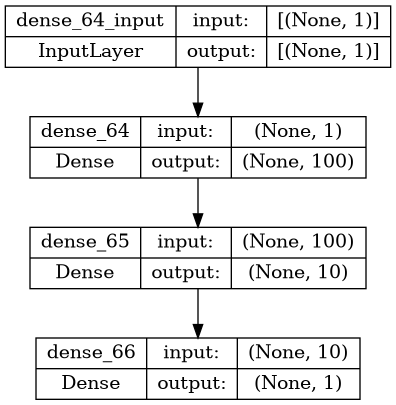

In [154]:
from tensorflow.keras.utils import plot_model
plot_model(model_4, show_shapes=True, to_file='model_4.png')


2/2 [==============================] - 0s 3ms/step


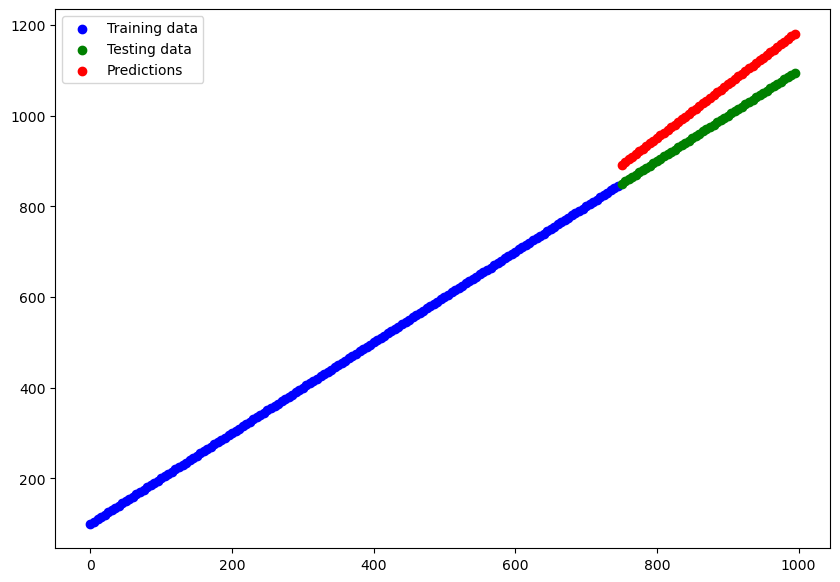

In [157]:

# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();
     

# The missing piece: Non-linearity

In [173]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_5.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

model_info = "Regression.Dense:1.Adam.E:100"
log_dir = "logs/fit/" + model_info + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

model_5.fit(X, y, epochs=100, callbacks=[tensorboard_callback])

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2980 - accuracy: 0.4610
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2344 - accuracy: 0.4640
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1343 - accuracy: 0.4670
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1026 - accuracy: 0.4660
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0865 - accuracy: 0.4650
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0823 - accuracy: 0.4660
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0795 - accuracy: 0.4660
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0775 - accuracy: 0.4660
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0756 - accuracy: 0.4660
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0738 - accuracy: 0.4660
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.8605 - accuracy: 0.4920
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8574 - accuracy: 0.4920
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8542 - accuracy: 0.4920
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8511 - accuracy: 0.4920
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8481 - accuracy: 0.4920
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8453 - accuracy: 0.4920
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8426 - accuracy: 0.4920
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8399 - accuracy: 0.4920
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8372 - accuracy: 0.4920
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8346 - accuracy: 0.4920
Epoch 93/100


In [174]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 15002), started 21:13:58 ago. (Use '!kill 15002' to kill it.)

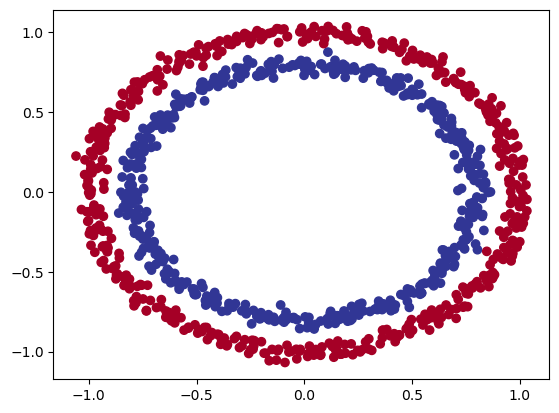

In [175]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 930us/step
doing binary classifcation...


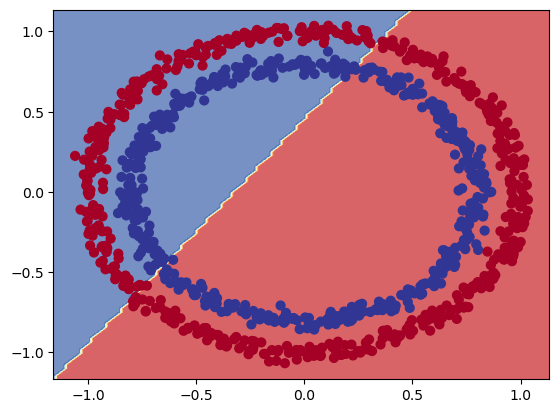

In [176]:
# Check the decision boundary 
plot_decision_boundary(model=model_5,
                      X=X,
                      y=y)

Let's try build our first neural network with non -lineral activation function.

In [198]:
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics="accuracy")

model_info = "Classification:Dense:1.Adam,lr=0.001.E:100"
log_dir = "logs/dir" + model_info + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# 3. Fit the model
model_6.fit(X, y, epochs=100, callbacks=[tensorboard_callback])

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5271 - accuracy: 0.4740
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4826 - accuracy: 0.4740
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4634 - accuracy: 0.4730
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4565 - accuracy: 0.4710
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4513 - accuracy: 0.4720
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4459 - accuracy: 0.4720
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4415 - accuracy: 0.4720
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4375 - accuracy: 0.4720
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4338 - accuracy: 0.4710
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4301 - accuracy: 0.4730
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.9312 - accuracy: 0.4930
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9201 - accuracy: 0.4930
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9103 - accuracy: 0.4950
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9017 - accuracy: 0.4940
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8941 - accuracy: 0.4940
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8869 - accuracy: 0.4950
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8807 - accuracy: 0.4950
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8746 - accuracy: 0.4960
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8691 - accuracy: 0.4960
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8639 - accuracy: 0.4960
Epoch 93/100


In [199]:
%tensorboard --logdir logs/fit

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


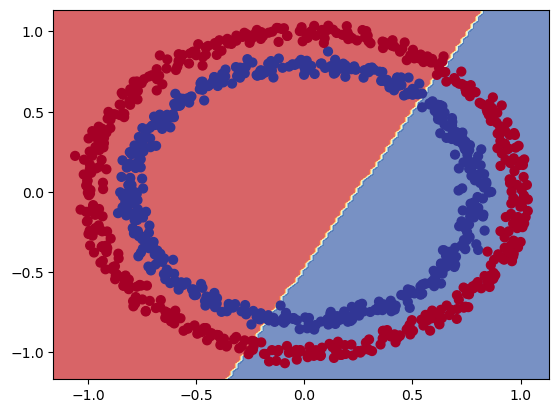

In [200]:
# Check the decision boundary 
plot_decision_boundary(model=model_6,
                      X=X,
                      y=y)

In [203]:
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics="accuracy")

model_info = "Classification:Dense:5,5.Adam,lr=0.001.E:100"
log_dir = "logs/fit" + model_info + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# 3. Fit the model
model_6.fit(X, y, epochs=100, callbacks=[tensorboard_callback])

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 5.0039 - accuracy: 0.2180
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.7804 - accuracy: 0.2200
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.6246 - accuracy: 0.2130
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4988 - accuracy: 0.1950
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3975 - accuracy: 0.1570
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2789 - accuracy: 0.1450
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1081 - accuracy: 0.1420
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9257 - accuracy: 0.1350
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7739 - accuracy: 0.1330
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.4915 - accuracy: 0.1370
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.7744 - accuracy: 0.4080
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7728 - accuracy: 0.4080
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7713 - accuracy: 0.4060
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7698 - accuracy: 0.4000
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7683 - accuracy: 0.3940
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7669 - accuracy: 0.3880
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7655 - accuracy: 0.3860
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7641 - accuracy: 0.3800
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7627 - accuracy: 0.3790
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7613 - accuracy: 0.3760
Epoch 93/100


In [205]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 75198), started 0:02:09 ago. (Use '!kill 75198' to kill it.)

In [210]:
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics="accuracy")

model_info = "Classification:Dense:5,5,1.Adam,lr=0.001.E:100"
log_dir = "logs/fit/" + model_info + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# 3. Fit the model
model_7.fit(X, y, epochs=100, callbacks=[tensorboard_callback])

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 93/100


In [214]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 75198), started 0:07:12 ago. (Use '!kill 75198' to kill it.)

In [215]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [213]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 897us/step - loss: 0.7503 - accuracy: 0.3440


[0.7503441572189331, 0.3440000116825104]

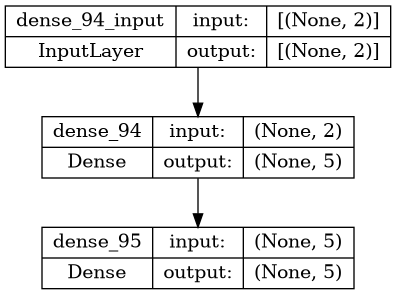

In [216]:
from tensorflow.keras.utils import plot_model
plot_model(model_6, show_shapes=True)

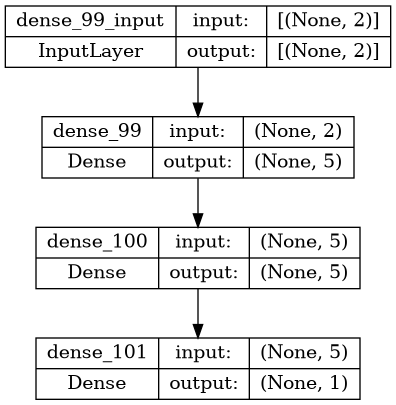

In [217]:
plot_model(model_7, show_shapes=True)

313/313 [==============================] - 0s 671us/step
doing multiclass classification...


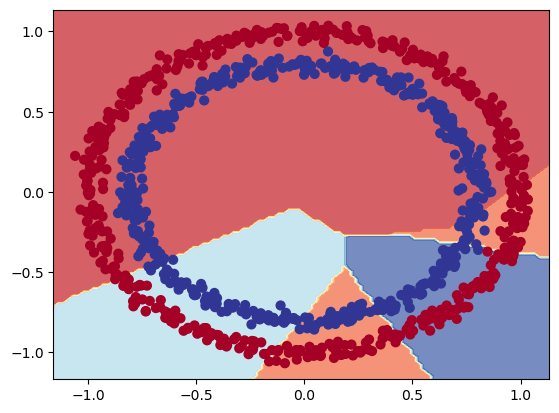

In [218]:
# How do our model predicitons look?
plot_decision_boundary(model_6, X, y)

313/313 [==============================] - 0s 687us/step
doing binary classifcation...


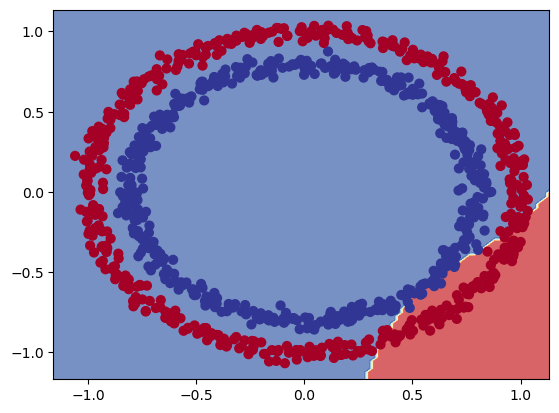

In [219]:
plot_decision_boundary(model_7, X, y)

313/313 [==============================] - 0s 790us/step
doing binary classifcation...


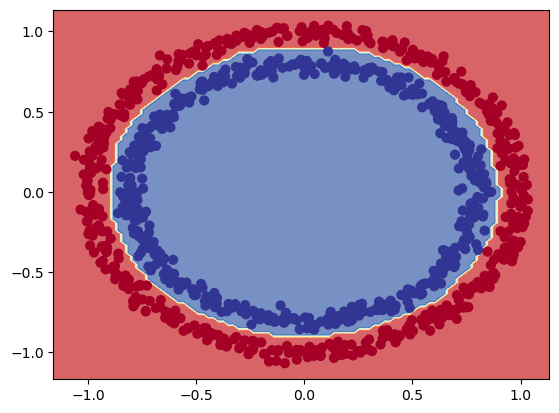

In [222]:
plot_decision_boundary(model_3, X, y)

In [224]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0048 - accuracy: 1.0000


[0.0048370338045060635, 1.0]

In [225]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7503 - accuracy: 0.3440


[0.7503441572189331, 0.3440000116825104]

In [227]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [23]:
# Creaet a toy a tensor (similar to the data we pass into our moels)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

NameError: name 'tf' is not defined

In [13]:
# Visualize our toy tensor
plt.plot(A);

NameError: name 'A' is not defined

In [14]:
# Let's start by replicating sigmoid - sigmoid(X) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmodi funciton of our toy tensor
sigmoid(A)

NameError: name 'A' is not defined

In [15]:
plt.plot(sigmoid(A))

NameError: name 'A' is not defined

In [16]:
def relu(x):
    return tf.maximum(x, 0)

relu(A)

NameError: name 'A' is not defined

In [17]:
plt.plot(relu(A))

NameError: name 'A' is not defined

In [18]:
plt.plot(tf.nn.softmax(A))

NameError: name 'tf' is not defined

In [19]:
tf.keras.activations.linear(A)

NameError: name 'tf' is not defined

In [20]:
# Does the linear activation fucntion change anything?
plt.plot(tf.keras.activations.linear(A))

NameError: name 'tf' is not defined

In [21]:
A == tf.keras.activations.linear(A)

NameError: name 'A' is not defined

## Evaluating and improving ou classification

In [22]:
# Check how many examples we have
len(X)

1000

In [39]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [1]:
import os
import datetime

# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")  # Add activation="sigmoid"
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])  # Use a list for metrics

# Specify absolute path for TensorBoard logs
absolute_path = os.path.abspath(
    "C:\\Users\\Kajetan\\tensorflow_fundamentals-main\\logs\\fit"
)

# Set up TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=absolute_path)

# 3. Fit the model
model.fit(X, y, epochs=25, callbacks=[tensorboard_callback])

NameError: name 'tf' is not defined

In [49]:
%tensorboard --logdir logs/fit